### 444. Árvore de Decisão
<h1>Árvores de Decisão</h1><h2>Conceito</h2><ul><li>Método de classificação e regressão efetivo e popular</li><li>Conjunto de regras fáceis de entender e implementar</li><li>Descobre padrões complexos nos dados</li><li>Objetivo é criar um modelo que faz previsões por regras de decisão simples</li></ul><h2>Estrutura</h2><ul><li>Representa caminhos de decisão possíveis</li><li>Quantidade de decisões é parametrizável</li></ul><h2>Vantagens</h2><ul><li>Fácil interpretação</li><li>Descobre interações complexas nos dados</li><li>Melhores resultados que regressão logística</li></ul><h2>Próximos passos</h2><ul><li>Discutir tipos de árvores</li><li>Implementação</li><li>Colocar em prática com dados reais</li></ul>


### 445. Estrutura de Árvore de Decisão
<h1>Árvores de Decisão</h1><h2>Tema central</h2><p>Algoritmos e estruturas que compõem uma árvore de decisão.</p><h2>Tópicos abordados</h2><h3>Exemplo prático</h3><ul><li>30 estudantes mapeados em 3 características (features):<ul><li>Gênero (masculino ou feminino)</li><li>Série (4a ou 5a série)</li><li>Altura (1,50m a 1,80m)</li></ul></li><li>Premissa: 15 estudantes jogam vôlei nas férias</li><li>Pergunta: Como criar um modelo para prever quem irá jogar vôlei?</li></ul><h3>Estrutura da árvore</h3><ul><li><strong>Nó raiz</strong>: representa toda a população, é dividido em subconjuntos homogêneos.</li><li><strong>Dividindo</strong>: ponto onde o nó é dividido em subnós.</li><li><strong>Nó de decisão</strong>: subconjuntos formados a partir da divisão de um nó.</li><li><strong>Folha</strong>: nós que não são mais divididos.</li><li><strong>Poda</strong>: remoção de subnós.</li><li><strong>Subárvore</strong>: subdivisão da árvore.</li><li><strong>Nó pai e filho</strong>: relação entre um nó e os nós derivados dele.</li></ul><h3>Identificando a melhor variável</h3><ul><li>Afeta a precisão da árvore</li><li>Utiliza algoritmos como Gini, Entropy</li><li>Quanto maior o Gini, mais homogênea é a divisão</li><li>Calcula Gini dos subnós e pondera pelo tamanho</li><li>Seleciona a divisão com maior Gini ponderado</li></ul><h3>Exemplo de cálculo do Gini</h3><ul><li>Divisão por gênero e série</li><li>Calcula Gini de cada subnó</li><li>Pondera pelo tamanho do subnó</li><li>Seleciona a divisão pelo gênero por ter maior Gini ponderado</li></ul>

### 446. Árvore de Decisão na Prática
<h1>Árvores de Decisão na Prática</h1><h2>Construindo uma Árvore de Decisão</h2><ul><li>Importando bibliotecas (pandas, matplotlib, dataset)</li><li>Separando variáveis explicativas (X) e variável target (y)<ul><li>X: variáveis categóricas transformadas em dummies</li><li>y: variável categórica (sim/não)</li></ul></li><li>Criando o modelo (decisionTreeClassifier)</li><li>Treinando o modelo nos dados (fit)</li></ul><h2>Analisando a Árvore de Decisão</h2><ul><li>Plotando a árvore<ul><li>Mostra as divisões (genes)</li><li>Seleciona variáveis aleatoriamente</li><li>Vai dividindo recursivamente</li><li>Para quando não há mais homogeneidade (gene = 0)</li></ul></li><li>Permite visualizar o funcionamento do algoritmo</li><li>Análises futuras:<ul><li>Avaliar se o modelo está predizendo bem</li><li>Otimizar o modelo (hiperparâmetros, etc)</li></ul></li></ul><h2>Próximos Passos</h2><ul><li>Construir sua própria árvore de decisão</li><li>Fazer uma análise completa do modelo</li><li>Aplicar o aprendizado em casos mais complexos (CrispDM)</li></ul><p>O vídeo aborda o processo prático de construção e análise de uma árvore de decisão simples. Começa importando os dados, separando variáveis, criando e treinando o modelo. Depois, plota a árvore para analisar seu funcionamento, as divisões que ela faz e como para recursivamente. Isso permite entender como o algoritmo funciona. Por fim, deixa próximos passos para construir sua própria árvore, analisá-la mais a fundo e aplicar o aprendizado em casos mais complexos.</p>


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [3]:
dados = pd.read_excel('golf_df.xlsx')

In [4]:
dados.head()

,clima,temp,umidade,vento,jogar
0,sunny,hot,high,no,no
1,sunny,hot,high,yes,no
2,overcast,hot,high,no,yes
3,rainy,mild,high,no,yes
4,rainy,cool,normal,no,yes


In [5]:
dados_codificado = pd.get_dummies(dados[['clima', 'temp', 'umidade', 'vento']], dtype=int)
dados_codificado.head()

,clima_overcast,clima_rainy,clima_sunny,temp_cool,temp_hot,temp_mild,umidade_high,umidade_normal,vento_no,vento_yes
0,0,0,1,0,1,0,1,0,1,0
1,0,0,1,0,1,0,1,0,0,1
2,1,0,0,0,1,0,1,0,1,0
3,0,1,0,0,0,1,1,0,1,0
4,0,1,0,1,0,0,0,1,1,0


In [6]:
y = dados["jogar"]
y

0      no
1      no
2     yes
3     yes
4     yes
5      no
6     yes
7      no
8     yes
9     yes
10    yes
11    yes
12    yes
13     no
Name: jogar, dtype: object

In [92]:
#Com os dados convertidos, temos que converter também a coluna alvo para número. 

#Utilizando o conceito de função lambda visto em aulas anteriores, iremos converter a string não para 0 e a string sim para 1.

In [7]:
y = np.where(dados['jogar'] == "no", 0, 1)

In [8]:
from sklearn import tree

In [9]:
arvore_decisao = tree.DecisionTreeClassifier()

In [10]:
modelo_ad = arvore_decisao.fit(dados_codificado, y)

In [11]:
modelo_ad

DecisionTreeClassifier()

In [12]:
# Note que por padrão utiliza-se o critério GINI para realizar a divisão.

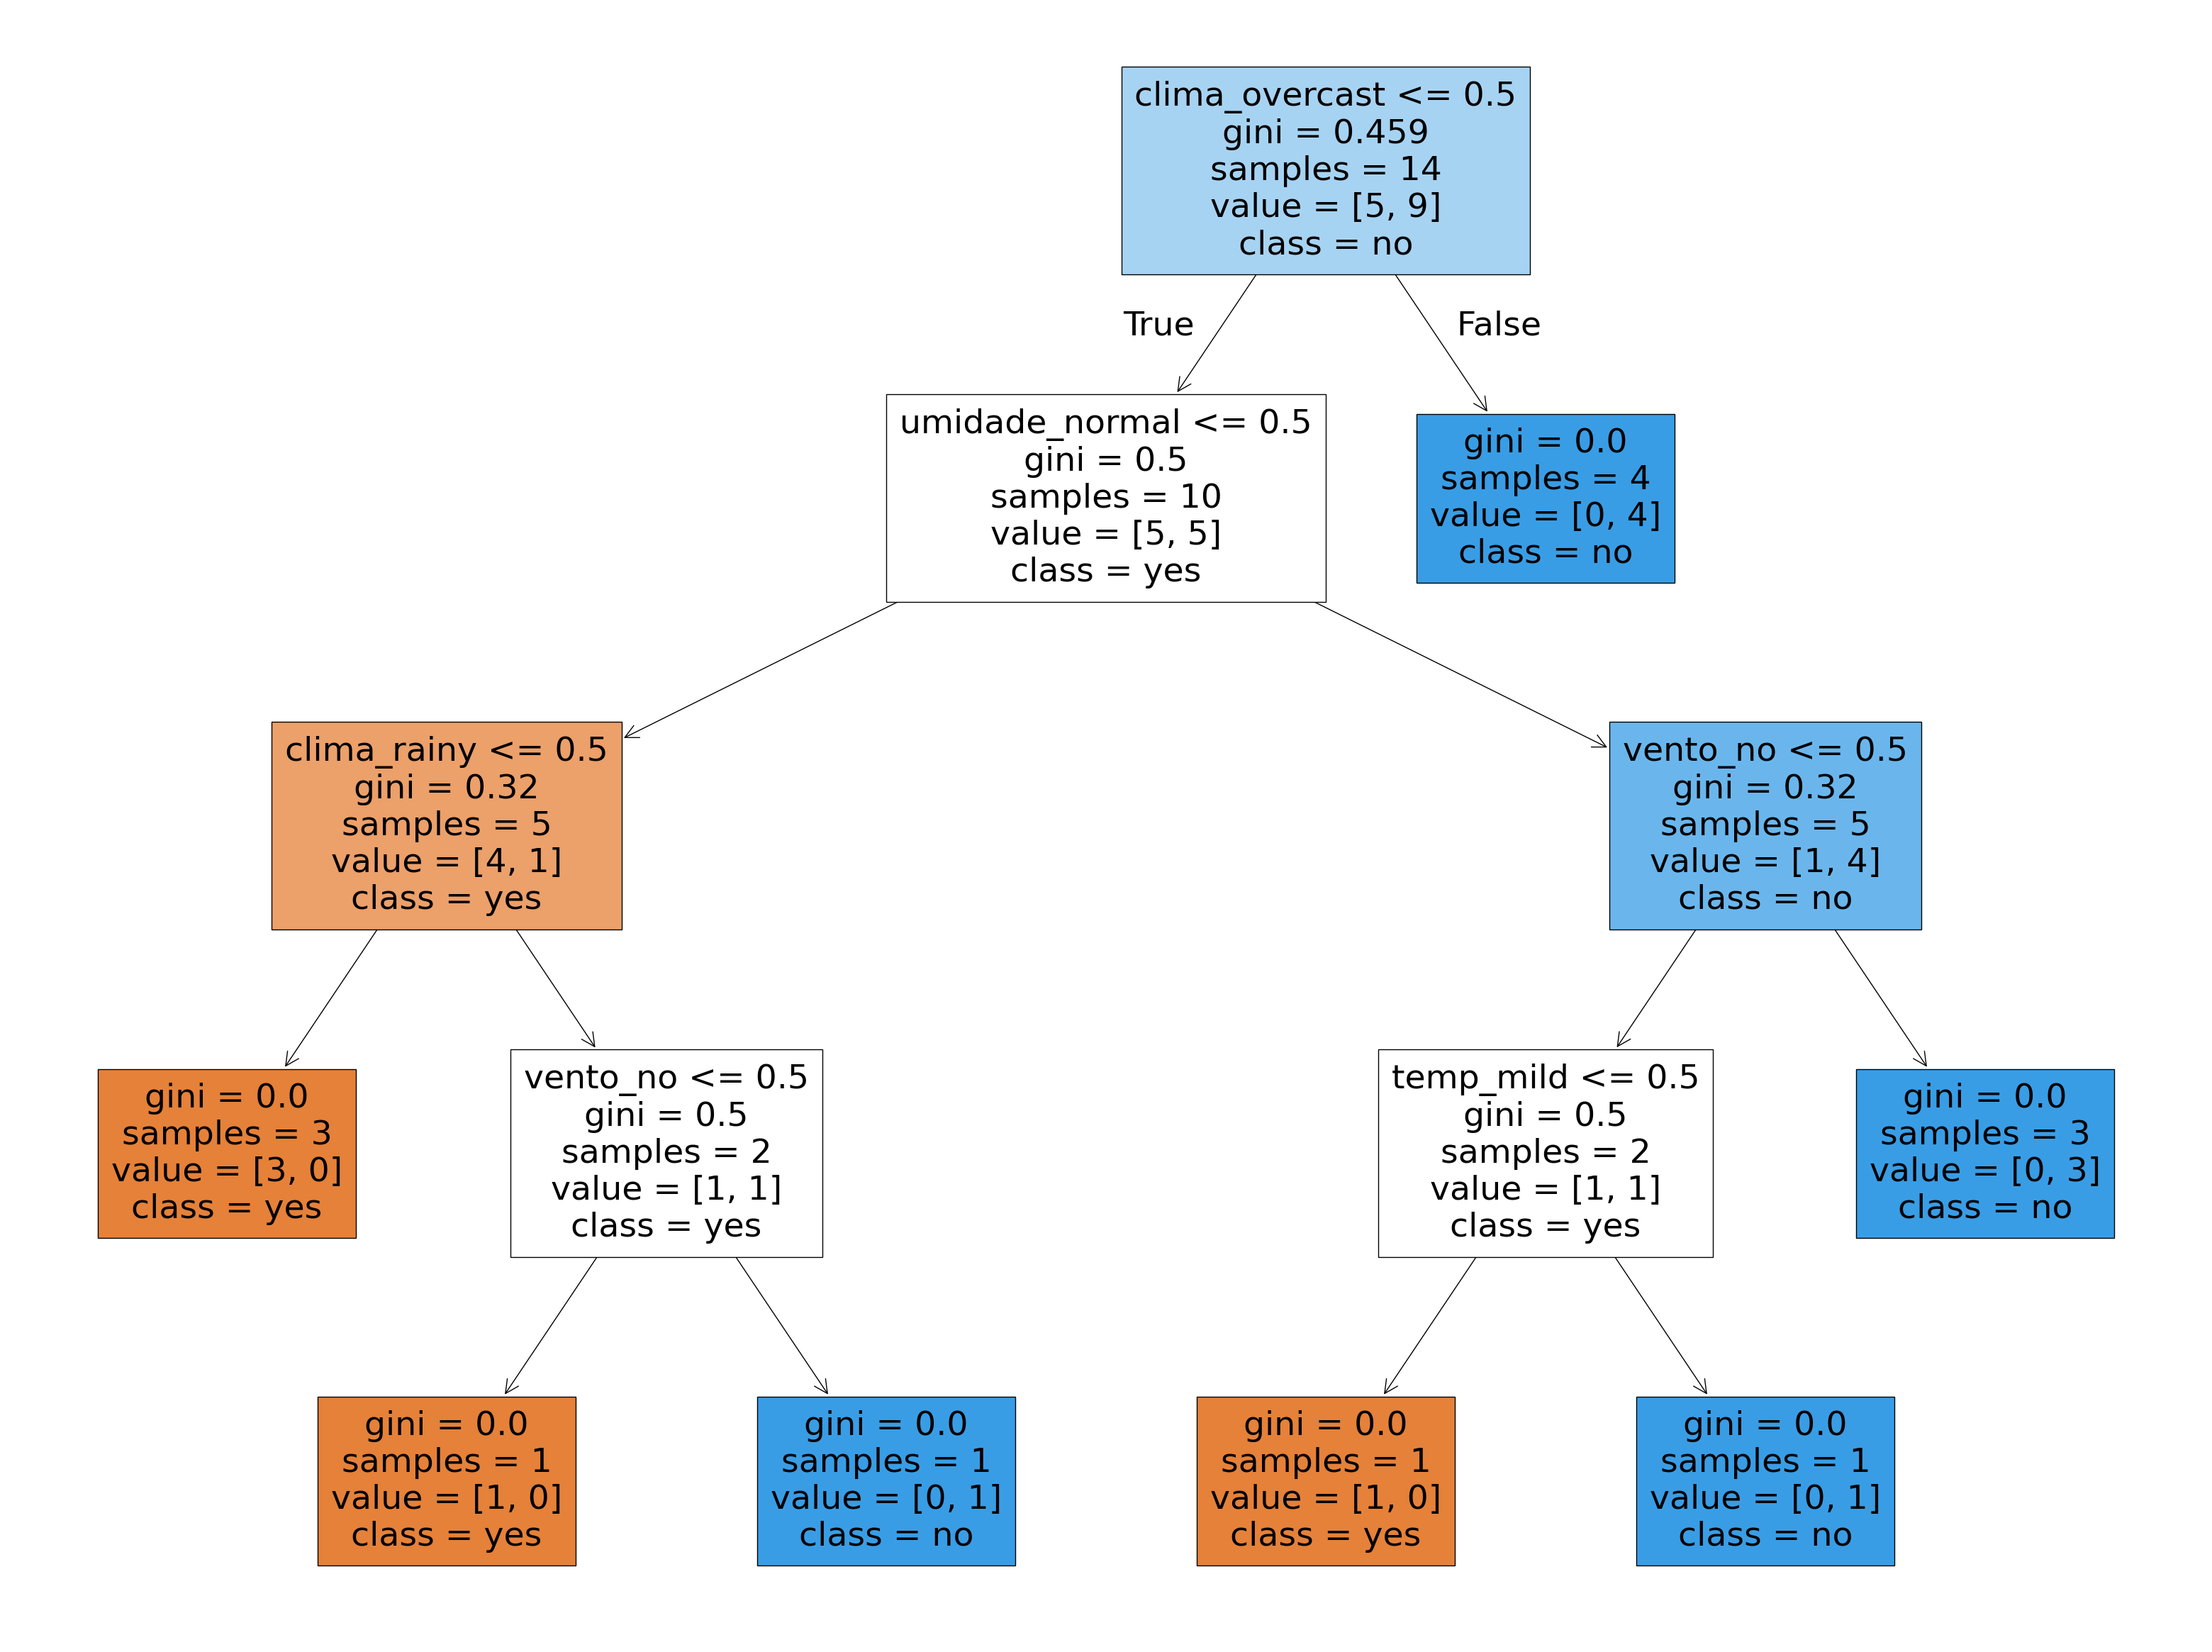

In [99]:
# Criando uma arvore
from sklearn import tree
fig = plt.figure(figsize=(40,30))

fig = tree.plot_tree(modelo_ad,
                   feature_names=dados_codificado.columns,
                   class_names=['yes', "no"],
                   filled=True)

### 447. Árvore de Decisão - Exercício
<h1>Tema central: Desafio de predição usando Decision Tree</h1><h2>Objetivo</h2><ul><li>Utilizar o algoritmo Decision Tree para prever se um cliente realizou uma compra ou não</li></ul><h2>Dados</h2><ul><li>Base de dados com:<ul><li>Média dos ratings</li><li>Média das vendas</li></ul></li></ul><h2>Etapas</h2><ul><li>Transformações necessárias nos dados<ul><li>Definir variáveis explicativas</li><li>Definir variável target (realizou compra ou não)</li></ul></li><li>Aplicar algoritmo Decision Tree<ul><li>Fazer predições</li></ul></li><li>Plotar árvore de decisão</li><li>Analisar árvore de decisão<ul><li>Análise conforme aprendido durante o curso</li><li>Obter embasamento técnico</li></ul></li></ul><h2>Entrega</h2><ul><li>Precisão utilizando Decision Tree</li><li>Árvore de decisão plotada</li><li>Análise da árvore de decisão</li></ul><p>Espero que este resumo em forma de mapa mental facilite a visualização do conteúdo e dos tópicos abordados no vídeo. Fiz um apanhado geral do desafio proposto, incluindo objetivo, dados, etapas principais e entrega esperada. Caso tenha alguma dúvida ou precise de mais detalhes, por favor me avise.</p>

### 448. Árvore de Decisão - Gabarito
<h1>Treinando um modelo de Árvore de Decisão</h1><h2>Importando bibliotecas e dados</h2><ul><li>Importando bibliotecas necessárias (pandas, matplotlib, sklearn)</li><li>Lendo a base de dados de vendas (vendas.xlsx)</li><li>Analisando as variáveis da base:<ul><li>média de rating</li><li>média de pedidos</li><li>se é um teste</li><li>se o cliente comprou (variável target)</li></ul></li></ul><h2>Pré-processamento</h2><ul><li>Separando features (X) e target (y)</li><li>Aplicando pd.get_dummies nas features categóricas</li></ul><h2>Treinando o modelo</h2><ul><li>Importando DecisionTreeClassifier</li><li>Treinando o modelo de árvore de decisão</li><li>Plotando a árvore para visualizar as decisões</li></ul><h2>Entendendo a árvore</h2><ul><li>A árvore vai dividindo os dados com base nas features</li><li>Em cada nó, verifica-se a giní (homogeneidade)</li><li>Quanto maior a giní, mais aquele nó é dividido em decisões</li><li>Até chegar nos nós finais (folhas), com giní 0.0</li></ul><h2>Considerações finais</h2><ul><li>Será necessário analisar se essa árvore está boa</li><li>Pode ser necessário aplicar mais transformações nos dados</li><li>Outros modelos serão vistos (SVM, KNN) para comparação e entendimento</li></ul>

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [33]:
dados = pd.read_excel('vendas.xlsx')

In [34]:
dados.head()

,media_rating,media_pedidos,test,cliente_comprou
0,1.5,11,No,Yes
1,2.5,11,No,No
2,2.5,11,No,No
3,1.5,13,No,Yes
4,2.5,13,No,No


In [35]:
x = dados[["media_rating", "media_pedidos", "test"]]

y = dados[["cliente_comprou"]]

In [36]:
x = pd.get_dummies(x,dtype=int)
x.head()

,media_rating,media_pedidos,test_No,test_Yes
0,1.5,11,1,0
1,2.5,11,1,0
2,2.5,11,1,0
3,1.5,13,1,0
4,2.5,13,1,0


In [37]:
from sklearn import tree

In [38]:
arvore_decisao = tree.DecisionTreeClassifier()

In [39]:
modelo_ad = arvore_decisao.fit(x, y)

In [40]:
modelo_ad

DecisionTreeClassifier()

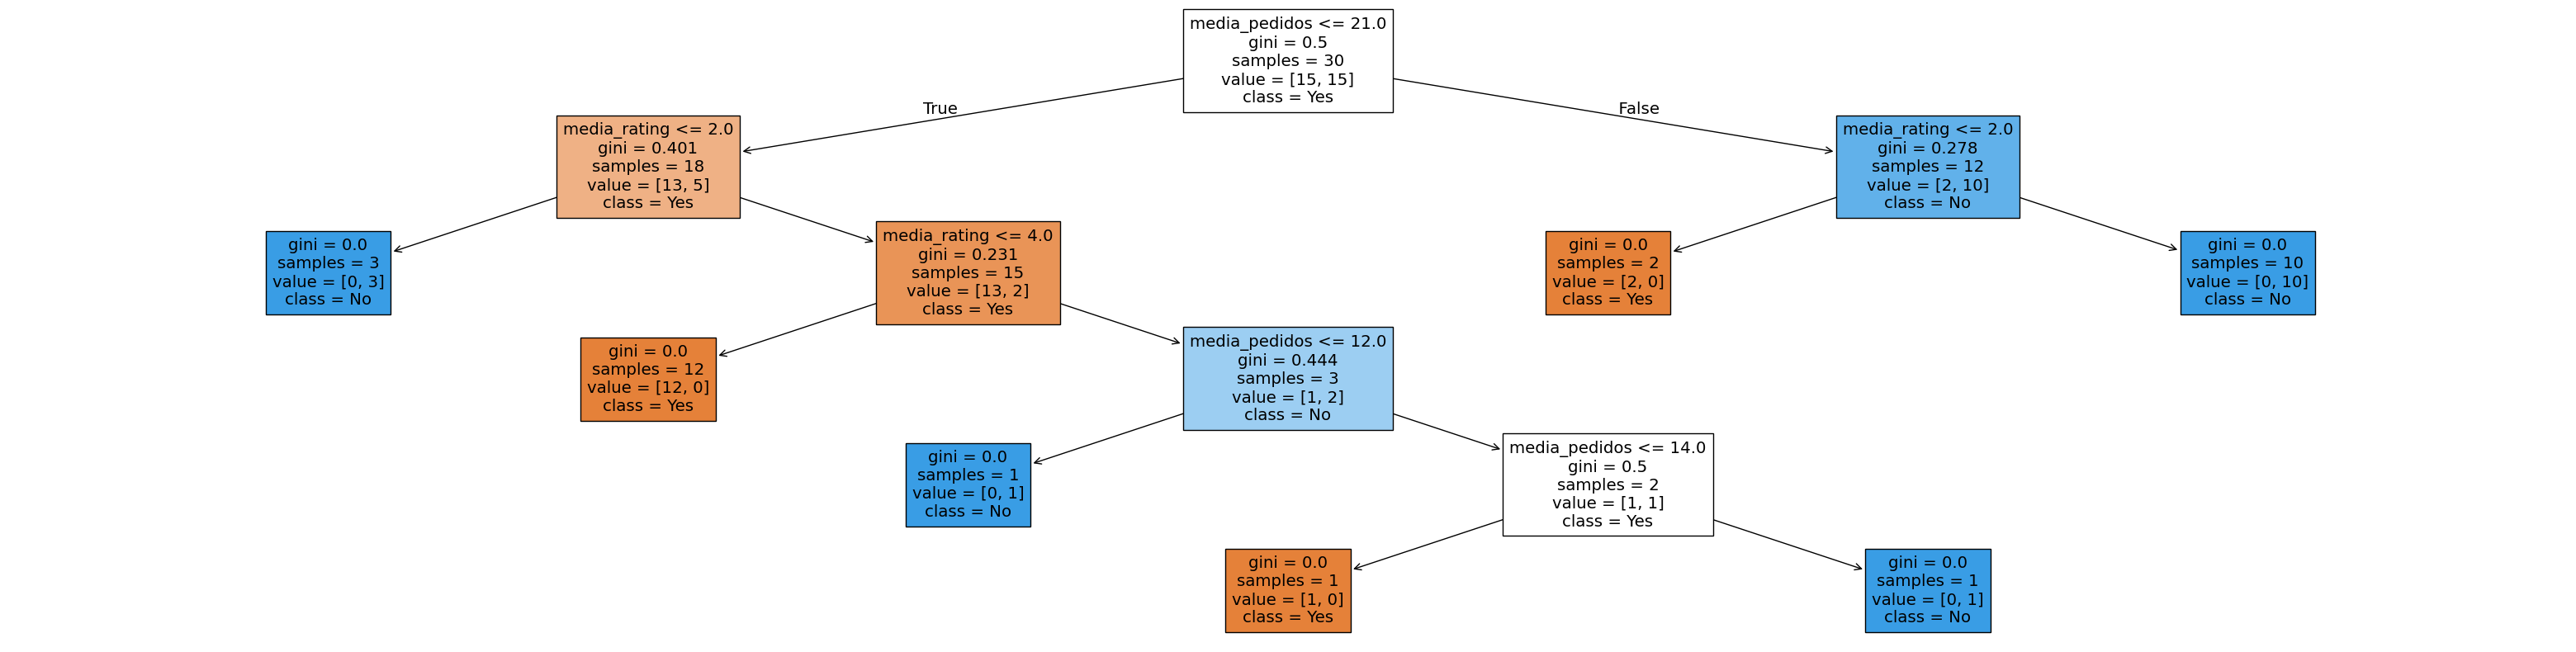

In [41]:
fig = plt.figure(figsize=(40,10))

_ = tree.plot_tree(modelo_ad,
                   feature_names=x.columns,
                   class_names=['Yes', "No"],
                   filled=True)

### 449. O que Aprendemos até aqui
<h1>Árvores de Classificação</h1><h2>O que são</h2><ul><li>Algoritmo de classificação</li><li>Extremamente utilizado e de fácil interpretação</li><li>Classifica a partir de decisões em cada variável</li></ul><h2>Funcionamento</h2><ul><li>Atua como um classificador</li><li>Toma decisões com base nas variáveis, seguindo a maior &quot;gene&quot;</li><li>Classifica de acordo com os caminhos percorridos</li></ul><h2>Vantagens</h2><ul><li>Fácil interpretação e visualização</li><li>Pode-se plotar a árvore de decisão</li><li>Mostra o caminho e decisões tomadas pelo algoritmo</li><li>Ajuda a explicar a decisão para o cliente</li></ul><h2>Resumo do vídeo</h2><ul><li>Parte introdutória sobre árvores de classificação</li><li>Próximos módulos:<ul><li>KNN</li><li>Máquina de vetores de suporte</li><li>Outros algoritmos</li><li>Bases maiores e mais desafiadoras</li></ul></li></ul>